In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import os
import re
import linecache

from shapely.geometry import Point, Polygon

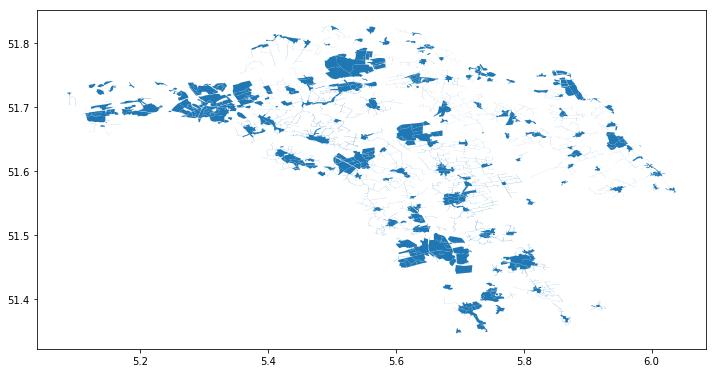

In [4]:
file_path = "/Users/blazejmanczak/Desktop/Q1/DataChallenge3/"
brabant = gpd.read_file(file_path + "waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp/Rioleringsdeelgebied.shp")
brabant = brabant.to_crs({'init': 'epsg:4326'})
brabant.plot(figsize = (12,12))
plt.show()

In [13]:
grid  = np.loadtxt(file_path + "waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29/Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T14h00m00s_2018-01-02T15h00m00s.asc"
                  ,skiprows=7)

grid_path = file_path + "waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29/Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T14h00m00s_2018-01-02T15h00m00s.asc"

In [14]:
def extract_reference(file_path):
    features = [linecache.getline(file_path, i) for i in range(1,7)]
    features = [float(re.sub(" +", " ", i.strip()).split()[1]) for i in features]
    return features
ref = extract_reference(grid_path)
ref

[300.0, 300.0, -0.0185, 48.9885, 0.037, 0.023]

In [15]:
def create_grid_df(tl_lat, tl_lon, dx, dy, grid_size = [300,300],
                  filter_nl = False):
    """ 
    Function that assigns to each point in a grid a (latitude, longitude)
    coordinate. Compiles a data frame with columns: value, lat, lon.
    Assumes that increasing x changes longitude and increase in y latitude.
    
    """
    df_entry = []
    for row in enumerate(grid): # each element of enumerate is a row of the grid
        latitude = tl_lat + row[0]*dy
        for val in enumerate(row[1]):
            df_entry.append([val[1], latitude, tl_lon + val[0]*dx])
            
    grid_df = pd.DataFrame(df_entry, columns= ['value [mm]',
                                           'latitude', 'longitude'])
    
    geometry = [Point(xy) for xy in zip(grid_df['longitude'], grid_df['latitude'])]  

    geo_grid_df = gpd.GeoDataFrame(grid_df, geometry = geometry)
    geo_grid_df.crs = {'init' :'epsg:4326'} 
    
    return geo_grid_df
            
grid_df = create_grid_df(ref[3], ref[2], ref[4], ref[5])
grid_df.head()

,value [mm],latitude,longitude,geometry
0,0.040190,48.9885,-0.0185,POINT (-0.0185 48.9885)
1,0.019682,48.9885,0.0185,POINT (0.0185 48.9885)
2,0.005034,48.9885,0.0555,POINT (0.05549999999999999 48.9885)
3,0.000151,48.9885,0.0925,POINT (0.09249999999999999 48.9885)
4,0.000151,48.9885,0.1295,POINT (0.1295 48.9885)


In [150]:
grid_df_brabant = geo_grid_df[(geo_grid_df['latitude']< 51.8) & (geo_grid_df['latitude'] >51.3) &
                     (5.2 < geo_grid_df['longitude']) & (6.1 > geo_grid_df['longitude'])]


#geo_df = gpd.GeoDataFrame(grid_df[(grid_df['latitude'])], geometry = geometry)
#geo_df
grid_df_brabant.shape

(528, 4)

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


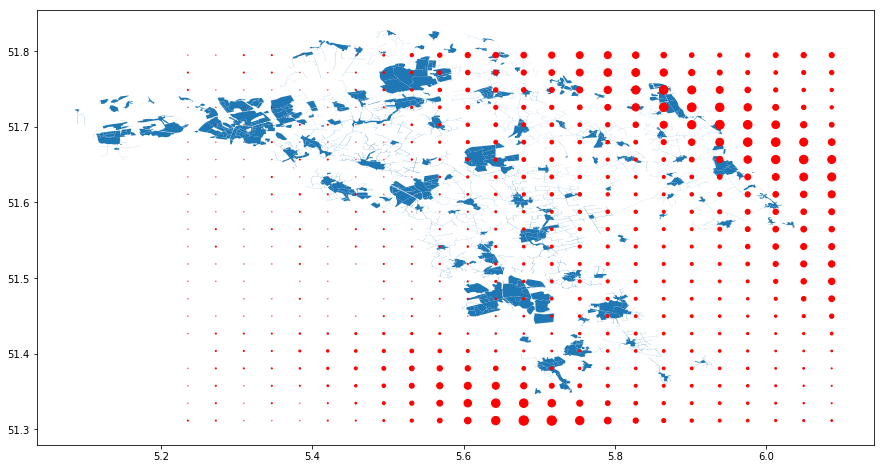

In [144]:
# Visualisation of rain based on how much rain fell
fig, ax = plt.subplots(figsize= (15,15))
brabant.plot(ax = ax, alpha = 0.999)
grid_df_brabant.plot(ax = ax, markersize = grid_df_brabant['value [mm]']*1000,
                     color = 'red',marker ='o', label = 'Fuck yeah')
plt.show()

In [149]:
g = [i for i in brabant.geometry]
x,y = g[0].exterior.coords.xy
coords = np.dstack((x,y)).tolist()
min(x)

5.8646681612658

In [ ]:
brabant['geometry'].apply(lambda p: p.centroid.x)

In [ ]:
# Getting the exact coordiates of each po
brabant['geometry'].apply(lambda p: p.exterior.coords.xy)[0]

In [112]:
#maxium coordintes
ref[3] + 299*ref[5], ref[2] + 299*ref[4]

(55.865500000000004, 11.0445)